### 분석사례2
"날씨가 어떤가요"

In [2]:
import pandas as pd

In [8]:
날씨 = pd.read_excel('share/data/weather.xlsx')

In [10]:
날씨[:3]

,location,date,weekDay,avgTemp,highestTemp,lowestTemp,precipitation,snow,windSpeed,humidity,cloud,dayTime,weather
0,seoul,2013-08-01,thur,28.0,32.1,24.5,-,-,1.8,66,7.1,6.0,구름많음
1,seoul,2013-08-02,fri,27.4,29.3,25.2,7.5,-,2.1,79,9.1,0.9,흐림/안개/비
2,seoul,2013-08-03,sat,28.9,32.6,26.7,0.1,-,3.6,72,8.1,8.9,흐림/소나기


In [12]:
len(날씨)

1460

In [14]:
날씨.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
location         1460 non-null object
date             1460 non-null datetime64[ns]
weekDay          1460 non-null object
avgTemp          1460 non-null float64
highestTemp      1460 non-null float64
lowestTemp       1460 non-null float64
precipitation    1460 non-null object
snow             1460 non-null object
windSpeed        1460 non-null float64
humidity         1460 non-null int64
cloud            1460 non-null float64
dayTime          1460 non-null float64
weather          1460 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 159.7+ KB


열에 들어 있는 값들의 종류와 등장하는 횟수, 즉 도수 집계

In [16]:
지역 = 날씨['location']

In [18]:
지역.value_counts()

seoul    730
suwon    730
Name: location, dtype: int64

지역별로 날씨 자료선택

In [20]:
지역[:3]

0    seoul
1    seoul
2    seoul
Name: location, dtype: object

In [22]:
서울인가 = 지역 == 'seoul'

In [24]:
서울날씨 = 날씨[서울인가]

In [25]:
서울날씨[-3:]

,location,date,weekDay,avgTemp,highestTemp,lowestTemp,precipitation,snow,windSpeed,humidity,cloud,dayTime,weather
1245,seoul,2015-07-29,wed,26.7,28.8,24.8,4,-,2.5,83,8.4,0.2,흐림/비/안개
1246,seoul,2015-07-30,thur,28.6,33.1,25.5,-,-,3.4,76,6.9,7.9,구름많음/안개
1247,seoul,2015-07-31,fri,27.9,32.4,26.2,-,-,2.7,74,6.6,6.7,구름많음/안개


In [26]:
서울날씨['location'].value_counts()

seoul    730
Name: location, dtype: int64

수원 지역 날씨만 선택하여 수원날시에 저장

In [27]:
수원인가 = 지역 == 'suwon'

In [28]:
수원날씨 = 날씨[수원인가]

In [29]:
수원날씨[-3:]

,location,date,weekDay,avgTemp,highestTemp,lowestTemp,precipitation,snow,windSpeed,humidity,cloud,dayTime,weather
1457,suwon,2015-07-29,wed,26.3,29.6,23.9,64.7,-,1.3,93,8.5,0.2,흐림/비/안개/천둥번개
1458,suwon,2015-07-30,thur,28.5,33.7,25.3,-,-,2.2,87,6.8,7.6,구름많음/안개
1459,suwon,2015-07-31,fri,27.6,32.8,25.2,-,-,1.8,85,7.1,7.1,구름많음/안개


In [31]:
수원날씨['location'].value_counts()

suwon    730
Name: location, dtype: int64

In [49]:
수원평균 = 수원날씨.sum()
수원평균
#수원일평균온도 = 수원날씨['avgTemp']
#수원더운날 = 수원일평균온도 > 수원평균
#수원더운날씨 = 수원날씨[수원더운날]
#수원더운날씨[:3]
#수원더운날씨 = 수원날씨[수원날씨['avgTemp']> 수원평균]

avgTemp         9612.0
highestTemp    13619.5
lowestTemp      6221.4
windSpeed       1349.5
humidity       49506.0
cloud           3417.3
dayTime         4892.4
dtype: float64

요일별 지역별 날씨

요일별 지역별 일평균기온의 (평균)

In [44]:
날씨.pivot_table('avgTemp', index='weekDay', columns='location')

location,seoul,suwon
weekDay,,
fri,13.330476,13.135238
mon,13.366346,13.239423
sat,13.725962,13.375000
sun,13.588462,13.374038
thur,13.208571,13.053333
tue,13.083654,12.900000
wed,13.257692,13.094231


In [45]:
요일별지역별_평균온도 = 날씨.pivot_table('avgTemp', index='weekDay', columns='location')

In [46]:
%matplotlib inline

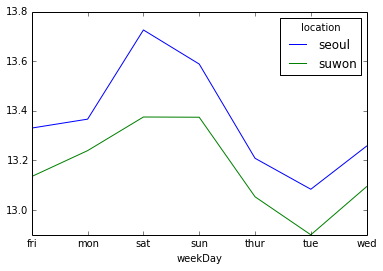

In [47]:
요일별지역별_평균온도.plot()

그런데 만약 요일 정보를 다음 열이 없었다면?

In [50]:
날씨.date[:3]

0   2013-08-01
1   2013-08-02
2   2013-08-03
Name: date, dtype: datetime64[ns]

In [55]:
요일알아내기 = lambda 날짜: 날짜.weekday()
요일 = 날씨.date.map(요일알아내기)

In [54]:
요일[:3]

0    3
1    4
2    5
Name: date, dtype: int64

In [69]:
def 요일알아내기(날짜):
    return 날짜.weekday()

요일 = 날씨.date.map(요일알아내기)

In [70]:
요일[:3]

0    3
1    4
2    5
Name: date, dtype: int64

In [71]:
요일매핑 = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

In [72]:
요일 = 요일.map(요일매핑)

추출한 요일 정보를 추출하고, 분류의 기준으로 활용하기

In [74]:
날씨.pivot_table('avgTemp', index=요일, columns='location')

location,seoul,suwon
date,,
금,13.330476,13.135238
목,13.208571,13.053333
수,13.257692,13.094231
월,13.366346,13.239423
일,13.588462,13.374038
토,13.725962,13.375000
화,13.083654,12.900000


### 연습
2016-07-15와 같은 형식의 날짜에 대해 다음을 수행
1. 연도별 지역별 평균 기온
2. 월별 지역별 평균기온
3. 연도별월별 지역별 평균기온

In [75]:
def 연도추출(날짜):
    return 날짜.year


In [82]:
첫날 = 날씨.date[0]
첫날.year

2013

In [83]:
첫날.month

8

In [86]:
연도 = 날씨.date.map(연도추출)

연도별지역별_평균기온 = 날씨.pivot_table('avgTemp', index=연도, columns='location')
연도별지역별_평균기온[:3]

location,seoul,suwon
date,,
2013,14.241176,14.192810
2014,13.396712,13.145479
2015,12.680189,12.464151


In [88]:
def 월추출(날짜) :
    return 날짜.month

In [90]:
월 = 날씨.date.map(월추출)

월별지역별평균기온 =  날씨.pivot_table('avgTemp', index=월, columns='location')
월별지역별평균기온[:3]

location,seoul,suwon
date,,
1,-0.808065,-0.572581
2,1.482143,1.689286
3,7.080645,6.766129


In [113]:
def 연도월추출(날짜) :
    return '{}-{:02d}'.format(날짜.year, 날짜.month)

In [116]:
연도월 = 날씨.date.map(연도월추출)

연도별월별지역별평균기온 =  날씨.pivot_table('avgTemp', index=연도월, columns='location')
연도별월별지역별평균기온[:3]

location,seoul,suwon
date,,
2013-08,27.696774,27.380645
2013-09,21.753333,21.720000
2013-10,15.774194,15.700000


In [118]:
날씨[:3]

,location,date,weekDay,avgTemp,highestTemp,lowestTemp,precipitation,snow,windSpeed,humidity,cloud,dayTime,weather
0,seoul,2013-08-01,thur,28.0,32.1,24.5,-,-,1.8,66,7.1,6.0,구름많음
1,seoul,2013-08-02,fri,27.4,29.3,25.2,7.5,-,2.1,79,9.1,0.9,흐림/안개/비
2,seoul,2013-08-03,sat,28.9,32.6,26.7,0.1,-,3.6,72,8.1,8.9,흐림/소나기


In [122]:
날씨['weather'][:3]

0       구름많음
1    흐림/안개/비
2     흐림/소나기
Name: weather, dtype: object

In [124]:
날씨.weather[:3] #컬럼명에 띄어쓰기가 없는 경우에 가능

0       구름많음
1    흐림/안개/비
2     흐림/소나기
Name: weather, dtype: object

In [128]:
기상서술도수 = 날씨.weather.value_counts()

In [127]:
%matplotlib inline

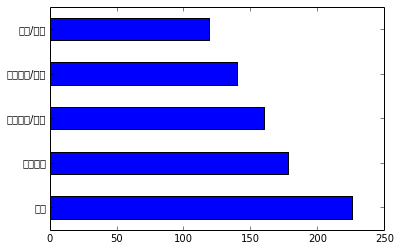

In [131]:
기상서술도수[:5].plot(kind='barh')

"눈비가 온 날과 그렇지 않은 날로 딱 두개로 분류했으면 좋겠는데 ..."

In [136]:
눈비여부 = 날씨.weather.str.contains('비|눈|소나기')
눈비여부[:3]

0    False
1     True
2     True
Name: weather, dtype: bool

In [140]:
눈비도수 = 눈비여부.value_counts()
눈비도수

False    1023
True      437
Name: weather, dtype: int64

In [143]:
눈비비율 = 눈비도수[True]/눈비도수.sum()*100
눈비비율

29.93150684931507

눈비 온 날과 그렇지 않은 날 지역별 평균 기온

In [147]:
지역별눈비여부별_평균기온 = 날씨.pivot_table('avgTemp', index='location', columns=눈비여부)
지역별눈비여부별_평균기온 = 지역별눈비여부별_평균기온.rename(columns={False:'안옴', True:'눈비'})

In [149]:
지역별눈비여부별_평균기온

weather,안옴,눈비
location,,
seoul,12.600394,15.105381
suwon,12.594380,14.548131


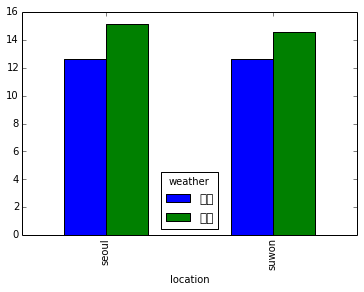

In [150]:
지역별눈비여부별_평균기온.plot(kind='bar')